# 1D Ising Model

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import ProgressBar

In [39]:
def random_state(shape):
    return np.random.randint(0,2,shape)*2 - 1

In [ ]:
# def paramagnet_metropolis_step(state, kT, b, nSteps=1):
#     """
#         Take one Metropolis step on the input state. The state is modified (or not) in place, so nothing is returned.
#         Energy function is for the 2-state paramagnet in magnetic field *b* at temperature *kT*.
#     """
#     for _ in range(nSteps):
#         idx = np.random.randint(len(state)) # pick a random spin
#         deltaE = 2*state[idx]*b # E = -mu B; dE = -(-mu B) - (-mu B) = 2 mu B
#         r = np.exp(-deltaE/kT)
#         if r >= 1 or np.random.uniform() < r:
#             state[idx] *= -1

In [40]:
# define the ising model metropolis step function here
def metropolis_step(state, kT, j, b, nSteps=1):
    for _ in range(nSteps):
        N = len(state)
        idx = np.random.randint(N)
        deltaE = 2*state[idx]*b + 2*j*state[idx]*(state[(idx-1) % N] + state[(idx+1) % N])
        r = np.exp(-deltaE/kT)
        if r >= 1 or np.random.uniform() < r:
            state[idx] *= -1

In [50]:
def energy(state, j, b):
    return -b*np.sum(state) -j*np.sum(state*np.roll(state,1))

In [86]:
def avg_mag(kT, j, b, N=100, Nsamples=1000, chunk_size=100):
    mags = np.zeros(Nsamples)
    ens = np.zeros(Nsamples)
    for i in range(Nsamples):
        if i % chunk_size == 0:
            s = random_state(N)
        metropolis_step(s, kT, j, b, N) # burn N steps to get an indep. sample
        mags[i] = np.sum(s)
        ens[i] = energy(s, j, b)
    return np.mean(mags), np.mean(ens)

In [97]:
temps = np.linspace(0.01,3,50)
mags = np.zeros_like(temps)
ens = np.zeros_like(temps)
progress = ProgressBar(len(temps))
for i in progress:
    mags[i], ens[i] = avg_mag(temps[i],1,0.0,Nsamples=1000,chunk_size=50)

[============================================================] 50/50

([<matplotlib.lines.Line2D at 0x7fa23a8bb128>],
 [<matplotlib.lines.Line2D at 0x7fa23a8bb080>])

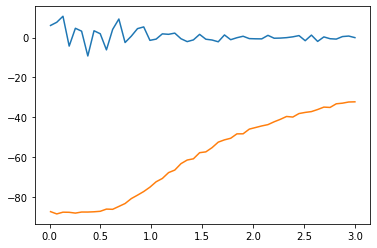

In [98]:
plt.plot(temps,mags), plt.plot(temps, ens)

1D Ising == Paramagnet (sort of)
SAME ENERGY FUNCTION (tanh beta)

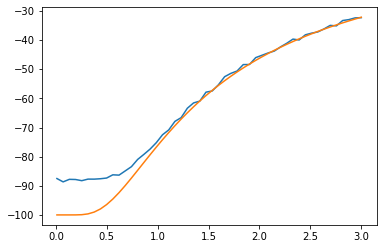

In [99]:
plt.plot(temps, ens)
plt.plot(temps, -100*np.tanh(1/temps))

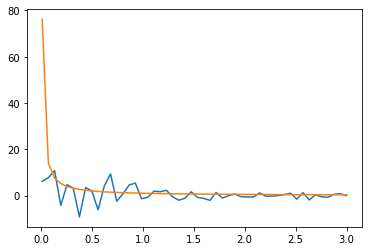

In [100]:
plt.plot(temps, mags)
plt.plot(temps, 100*np.tanh(0.01/temps))

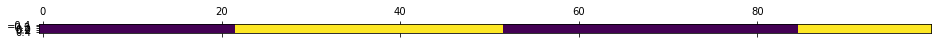

In [112]:
s = random_state(100)
metropolis_step(s, 0.5, 1, 0, 10000)
plt.matshow([s])